# Telecom Churn Case Study

## Table of Contents
* [Problem Statement](#Problem-Statement)
* [Libraries Used](#Loading-Libraries)
* [Reading Datasets](#Reading-Datasets)
* [Data Preparation](#Data-Preparation)
* [Exploratory DataAnalysis](#Exploratory-DataAnalysis)
* [Finding CoRelation](#Finding-CoRelation)
* [Feature Standardisation](#Feature-Standardisation)
* [Splitting TrainAndValidation](#Splitting-TrainAndValidation)
* [Principal ComponentAnalysis](#Principal-ComponentAnalysis)
* [PCA Unsupervised](#PCA-Unsupervised)
* [ADABoost](#ADABoost)
* [GradientBoost](#GradientBoost)
* [XGBoost](#XGBoost)
* [Conclusion](#Conclusion)

<a name="Problem-Statement"></a>
## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


<a name="Loading-Libraries"></a>
## Loading Libraries

In [1]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb  # Load this xgboost

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split





<a name="Reading-Datasets"></a>
## Reading Datasets

In [2]:
# train.csv(df_train) is the dataset given for training purpose
# test.csv(df_test) is the dataset over which we would run our model and post the results on Kaggle


df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df_train.shape
# There are 172 columns and 69999 rows in the dataset

(69999, 172)



<a name="Data-Preparation"></a>
## Data Preparation

In [5]:
# Identify columns that have single value only as they can be deleted. They will not add any value to the learing
list_singlevalue_colnames = []
for col in df_train.columns:
    if (df_train[col].nunique() == 1):
        print ( str(df_train[col].value_counts(dropna=False)) + "\n")     
        list_singlevalue_colnames.append(col)

list_singlevalue_colnames



circle_id
109    69999
Name: count, dtype: int64

loc_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64

std_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64

loc_ic_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64

last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64

last_date_of_month_7
7/31/2014    69600
NaN            399
Name: count, dtype: int64

last_date_of_month_8
8/31/2014    69266
NaN            733
Name: count, dtype: int64

std_og_t2c_mou_6
0.0    67231
NaN     2768
Name: count, dtype: int64

std_og_t2c_mou_7
0.0    67312
NaN     2687
Name: count, dtype: int64

std_og_t2c_mou_8
0.0    66296
NaN     3703
Name: count, dtype: int64

std_ic_t2o_mou_6
0.0    67231
NaN     2768
Name: count, dtype: int64

std_ic_t2o_mou_7
0.0    67312
NaN     2687
Name: count, dtype: int64

std_ic_t2o_mou_8
0.0    66296
NaN     3703
Name: count, dtype: int64



['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [6]:
# Based on the above result we can remove these columns from the dataset as they will not add any value to our learning.
df_train.drop(list_singlevalue_colnames,axis=1,inplace=True)
df_test.drop(list_singlevalue_colnames,axis=1,inplace=True)

In [7]:
df_train.shape
# There are 159 columns in the dataset now

(69999, 159)

In [8]:
df_train.info(verbose=1)
# Reviewing the Datatypes of all the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_

In [9]:
# Analysing the data in the columns whose datatype is Object
df_train[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [10]:
# There are 6 Columns that have date values but defined as Object. 
#Upon detailed analysis, these columns would not help in any our learning given they have no relation with the customer getting churned.

df_train.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)
df_test.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)

df_train.shape

(69999, 153)

In [11]:
# Identify all columns that have "Null values" AND are "categorial also". 
#We are trying to check if they are categorial by checking the count of distinct value_counts (is less than 5).

Category_cols = []
df_train_NA_Percent = round(df_train.isna().sum(axis=0)/df_train.shape[0]*100).sort_values(ascending=False)
df_train_NA_Percent = df_train_NA_Percent.reset_index()
df_train_NA_Percent.columns = ['colname','perc_of_null']

for cols,perc_of_null in zip(df_train_NA_Percent['colname'],df_train_NA_Percent['perc_of_null']):
    if perc_of_null > 0:
        if (df_train[cols].value_counts().count() < 5):
            print  ("Data Type: " + str(df_train.dtypes[cols]) + "\t NA Percentage:" + str(perc_of_null) + "%\t" + cols)
            print ( str(df_train[cols].value_counts(dropna=False)) + "\n") 
            Category_cols.append(cols)
            print ("\n")



Data Type: float64	 NA Percentage:75.0%	fb_user_6
fb_user_6
NaN    52431
1.0    16098
0.0     1470
Name: count, dtype: int64



Data Type: float64	 NA Percentage:75.0%	night_pck_user_6
night_pck_user_6
NaN    52431
0.0    17124
1.0      444
Name: count, dtype: int64



Data Type: float64	 NA Percentage:74.0%	fb_user_8
fb_user_8
NaN    51582
1.0    16397
0.0     2020
Name: count, dtype: int64



Data Type: float64	 NA Percentage:74.0%	fb_user_7
fb_user_7
NaN    52134
1.0    16249
0.0     1616
Name: count, dtype: int64



Data Type: float64	 NA Percentage:74.0%	night_pck_user_7
night_pck_user_7
NaN    52134
0.0    17435
1.0      430
Name: count, dtype: int64



Data Type: float64	 NA Percentage:74.0%	night_pck_user_8
night_pck_user_8
NaN    51582
0.0    18030
1.0      387
Name: count, dtype: int64





In [12]:
# Replacing the NA values in the Categorical columns by -1

df_train[Category_cols] = df_train[Category_cols].fillna(-1)
df_test[Category_cols] = df_test[Category_cols].fillna(-1)

In [13]:
# Identifying the remaining Columns with NA and checking if they can be replaced with zero
df_train_NA_Percent = round(df_train.isna().sum(axis=0)/df_train.shape[0]*100).sort_values(ascending=False)
df_train_NA_Percent = df_train_NA_Percent.reset_index()
df_train_NA_Percent.columns = ['colname','perc_of_null']
cols_toreplaceNA_withZero = []

for cols,perc_of_null in zip(df_train_NA_Percent['colname'],df_train_NA_Percent['perc_of_null']):
    if perc_of_null > 0:
        print (cols + " is of type " + str(df_train[cols].dtype) + " and total count of distinct values are " + str(df_train[cols].value_counts(dropna=False).sort_values(ascending=False).count()) + "\n") 
         
        cols_toreplaceNA_withZero.append(cols)


arpu_3g_6 is of type float64 and total count of distinct values are 5507

count_rech_3g_6 is of type float64 and total count of distinct values are 24

total_rech_data_6 is of type float64 and total count of distinct values are 37

arpu_2g_6 is of type float64 and total count of distinct values are 5390

max_rech_data_6 is of type float64 and total count of distinct values are 48

count_rech_2g_6 is of type float64 and total count of distinct values are 31

av_rech_amt_data_6 is of type float64 and total count of distinct values are 793

total_rech_data_7 is of type float64 and total count of distinct values are 42

total_rech_data_8 is of type float64 and total count of distinct values are 45

max_rech_data_7 is of type float64 and total count of distinct values are 46

max_rech_data_8 is of type float64 and total count of distinct values are 50

count_rech_2g_7 is of type float64 and total count of distinct values are 34

count_rech_2g_8 is of type float64 and total count of distinct

In [14]:
# After Analysis of all the columns identified we can replace the NA's with Zero
df_train[cols_toreplaceNA_withZero] = df_train[cols_toreplaceNA_withZero].fillna(0)
df_test[cols_toreplaceNA_withZero] = df_test[cols_toreplaceNA_withZero].fillna(0)


In [15]:
# Checking if there are any more NA Values in the dataset. There are none
round(df_train.isna().sum(axis=0)/df_train.shape[0]*100).sort_values(ascending=False)

id                    0.0
total_rech_data_8     0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
                     ... 
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
churn_probability     0.0
Length: 153, dtype: float64

In [16]:
df_train.shape
# There are 153 columns in the Dataset now

(69999, 153)

In [17]:
# Removing the 'id' column as this has no relation to the Churn Factor
df_train.drop(['id'],inplace=True,axis=1)
df_test.drop(['id'],inplace=True,axis=1)




<a name="Exploratory-DataAnalysis"></a>
## Exploratory DataAnalysis

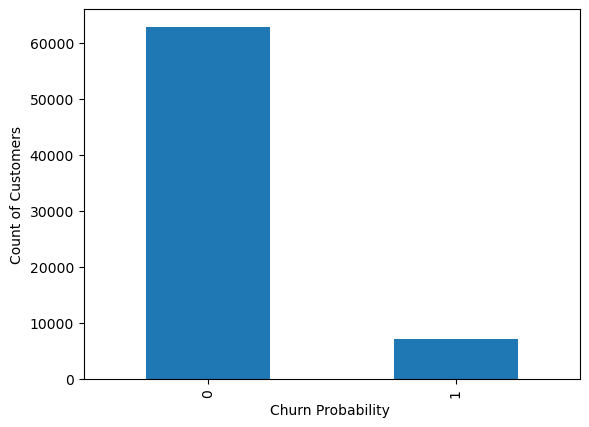

In [18]:
# Overall Churn Rate
df_train['churn_probability'].value_counts().plot.bar()
plt.ylabel("Count of Customers")
plt.xlabel("Churn Probability ")
plt.show()

The training dataset is  imbalanaced given the difference in counts between ChurnProbability 0 and 1

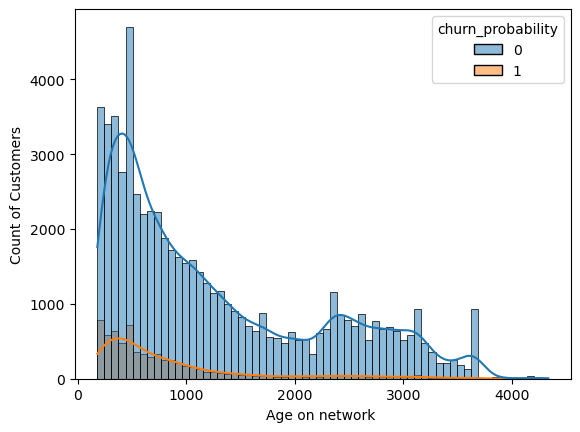

In [19]:
sns.histplot(data=df_train,x='aon',hue='churn_probability',kde=True)
plt.ylabel("Count of Customers")
plt.xlabel("Age on network ")
plt.show()



Most of the Churn is from the customers with low AON (Age on network). Customers with high AON are unlikely to leave.

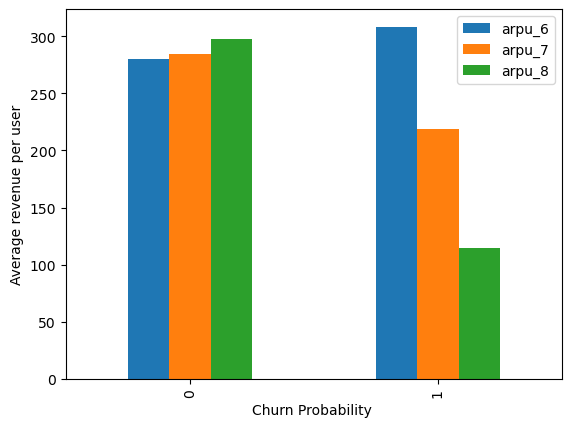

In [20]:
df_pivot1 = df_train.groupby('churn_probability')[['arpu_6','arpu_7','arpu_8']].mean().reset_index()

df_pivot1.plot(x="churn_probability", y=["arpu_6", "arpu_7",'arpu_8'], kind="bar") 

plt.ylabel("Average revenue per user")
plt.xlabel("Churn Probability ")
plt.show()


The ARPU (Average Revenue Per User Decrease month after month is one of the factor to predict churn.

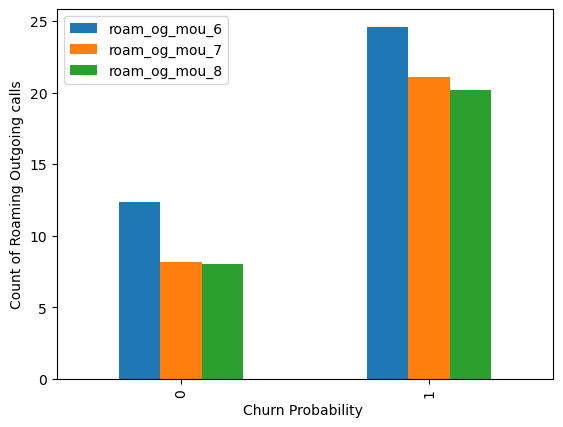

In [21]:

df_pivot1 = df_train.groupby('churn_probability')[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].mean().reset_index()

df_pivot1.plot(x="churn_probability", y=['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'], kind="bar") 

plt.ylabel("Count of Roaming Outgoing calls")
plt.xlabel("Churn Probability ")
plt.show()

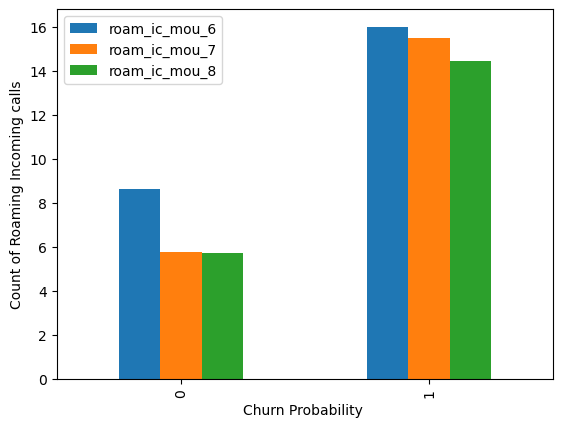

In [22]:

df_pivot1 = df_train.groupby('churn_probability')[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].mean().reset_index()

df_pivot1.plot(x="churn_probability", y=['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'], kind="bar") 

plt.ylabel("Count of Roaming Incoming calls")
plt.xlabel("Churn Probability ")
plt.show()


The Mean number of Incoming/Outgoing calls is high for customers who are at risk of Churn

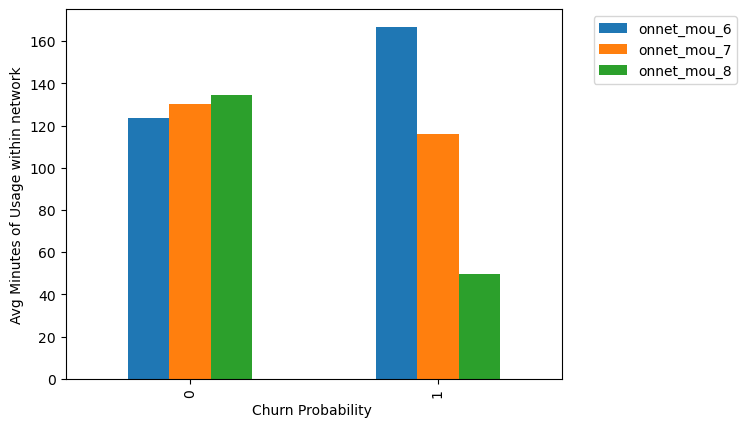

In [23]:
df_pivot1 = df_train.groupby('churn_probability')[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].mean().reset_index()

df_pivot1.plot(x="churn_probability", y=['onnet_mou_6','onnet_mou_7','onnet_mou_8'], kind="bar") 



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("Avg Minutes of Usage within network")
plt.xlabel("Churn Probability ")
plt.show()


The MOU : (Minutes of usage Decrease month after month is one of the factor to predict churn)

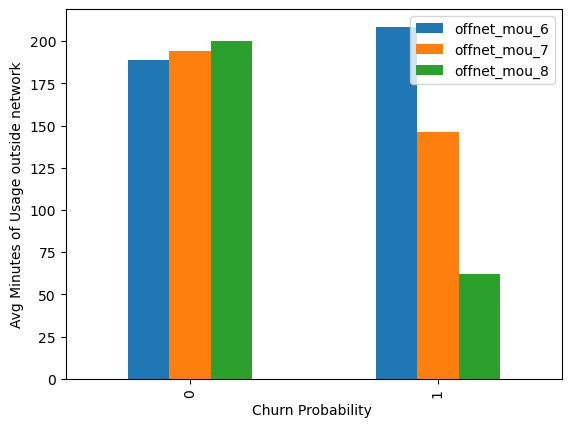

In [24]:
df_pivot1 = df_train.groupby('churn_probability')[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].mean().reset_index()

df_pivot1.plot(x="churn_probability", y=['offnet_mou_6','offnet_mou_7','offnet_mou_8'], kind="bar") 

plt.ylabel("Avg Minutes of Usage outside network")
plt.xlabel("Churn Probability ")
plt.show()

The MOU : (Minutes ofA Steedy Decrease Month after Month in Avg Min outside woek is also a factor for Churn.

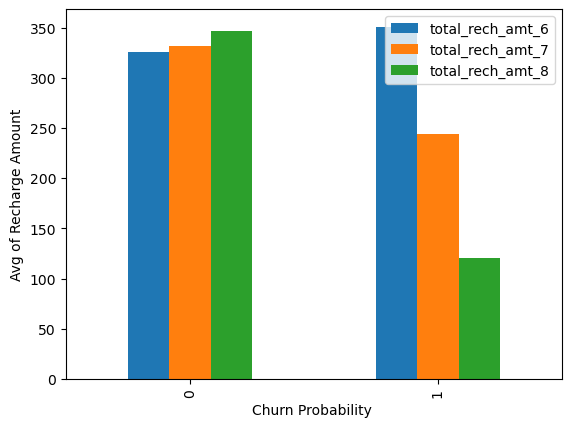

In [25]:
df_pivot1 = df_train.groupby('churn_probability')[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean().reset_index()

df_pivot1.plot(x="churn_probability", y=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'], kind="bar") 

plt.ylabel("Avg of Recharge Amount")
plt.xlabel("Churn Probability ")
plt.show()


RECH   : (Continuos decrease in Recharge Anoun month after month is one of the factor to predict churn)


<a name="Finding-CoRelation"></a>
## Finding CoRelation

In [26]:
df_train.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,-1.0,-1.0,-1.0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,-1.0,-1.0,-1.0,982,0.0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [27]:
df_train_desribe = df_train.describe()
df_train_desribe

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,...,0.081444,0.085487,-0.519050,-0.512650,-0.502650,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,56.260778,...,0.634547,0.680035,0.842376,0.845053,0.847641,952.426321,269.328659,267.899034,257.22681,0.302502
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [28]:
# Let's see the correlation matrix 
plt.figure(figsize = (120,120))        # Size of the figure
df_train_corr = df_train.corr()
df_train_corr.head()

# Create correlation matrix
df_train_corr = df_train.corr().abs()

# Select upper triangle of correlation matrix
upper = df_train_corr.where(np.triu(np.ones(df_train_corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

to_drop1 = [index for index in upper.index if any(upper[index] > 0.90)]


<Figure size 12000x12000 with 0 Axes>

<Axes: >

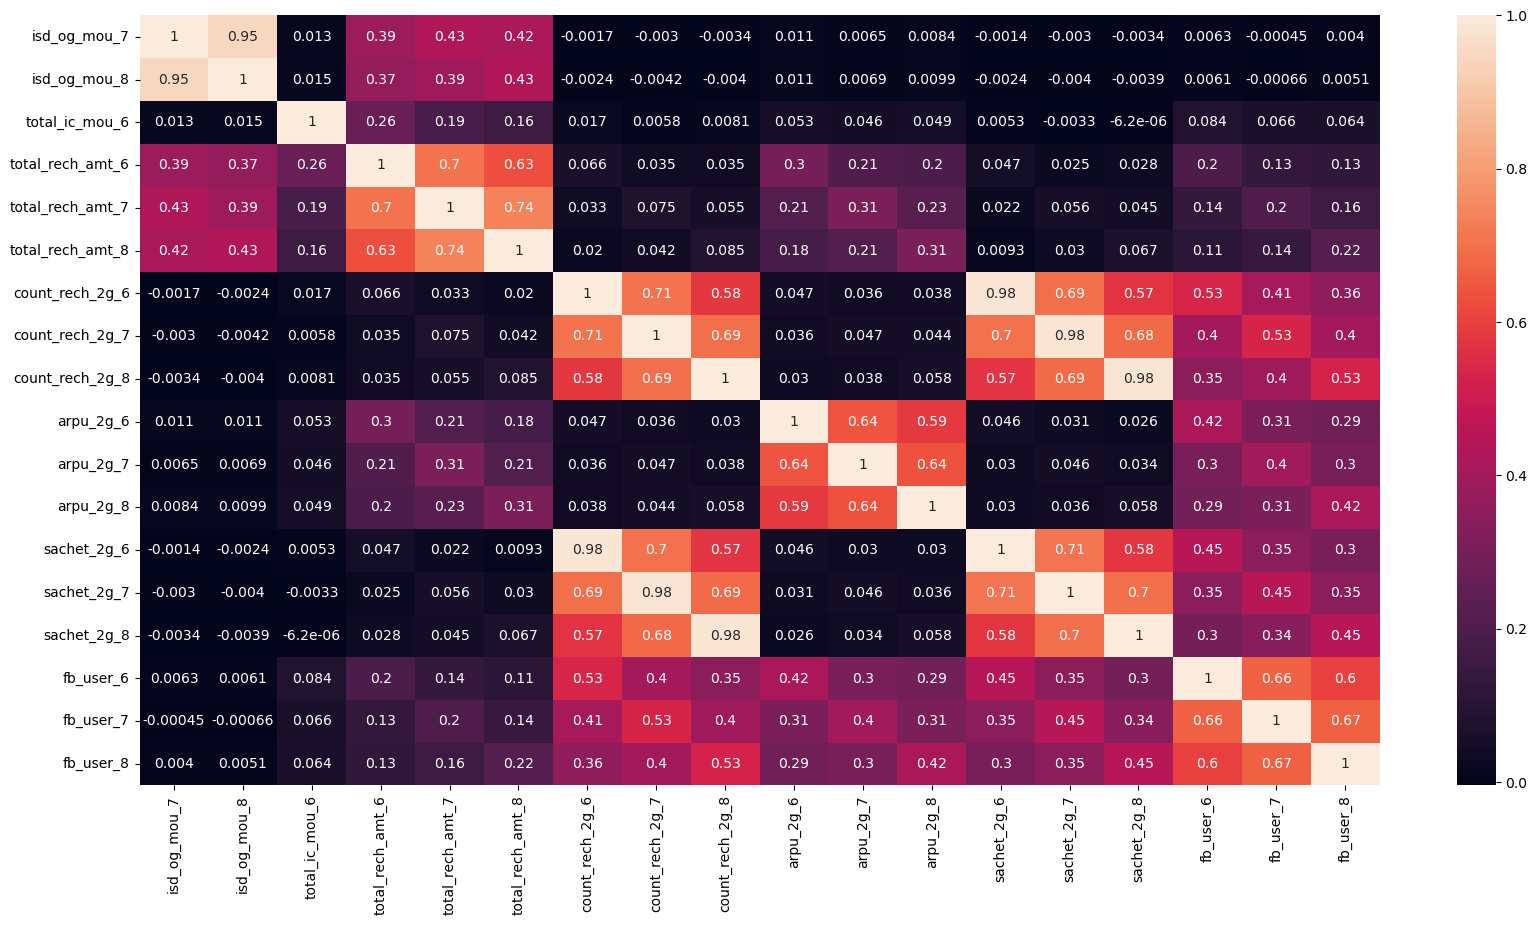

In [29]:
plt.figure(figsize = (20,10))  
sns.heatmap(df_train[to_drop].corr(),annot = True)



<a name="Feature-Standardisation"></a>
## Feature Standardisation

In [30]:
# When we are giving describe() most the data is not getting printed given large number of columns.
# Hence writing the below function to review every column (its datatype, minvalue, maxvalue and mean)

for cols in df_train.columns:
    print (cols + "  Min: " + str(df_train[cols].min()) + "  Max: " + str(df_train[cols].max()) + "  Mean: " + str(round(df_train[cols].mean(),2))   )

arpu_6  Min: -2258.709  Max: 27731.088  Mean: 283.13
arpu_7  Min: -1289.715  Max: 35145.834  Mean: 278.19
arpu_8  Min: -945.808  Max: 33543.624  Mean: 278.86
onnet_mou_6  Min: 0.0  Max: 7376.71  Mean: 127.89
onnet_mou_7  Min: 0.0  Max: 8157.78  Mean: 128.75
onnet_mou_8  Min: 0.0  Max: 10752.56  Mean: 125.94
offnet_mou_6  Min: 0.0  Max: 8362.36  Mean: 191.01
offnet_mou_7  Min: 0.0  Max: 7043.98  Mean: 189.59
offnet_mou_8  Min: 0.0  Max: 14007.34  Mean: 186.15
roam_ic_mou_6  Min: 0.0  Max: 2850.98  Mean: 9.38
roam_ic_mou_7  Min: 0.0  Max: 4155.83  Mean: 6.75
roam_ic_mou_8  Min: 0.0  Max: 4169.81  Mean: 6.63
roam_og_mou_6  Min: 0.0  Max: 3775.11  Mean: 13.63
roam_og_mou_7  Min: 0.0  Max: 2812.04  Mean: 9.46
roam_og_mou_8  Min: 0.0  Max: 5337.04  Mean: 9.25
loc_og_t2t_mou_6  Min: 0.0  Max: 6431.33  Mean: 45.05
loc_og_t2t_mou_7  Min: 0.0  Max: 7400.66  Mean: 44.39
loc_og_t2t_mou_8  Min: 0.0  Max: 10752.56  Mean: 43.27
loc_og_t2m_mou_6  Min: 0.0  Max: 4696.83  Mean: 89.55
loc_og_t2m_mou_7  M

In [31]:

scaler = StandardScaler()
X = df_train.drop(['churn_probability'],axis=1)
x = scaler.fit_transform(X)
y = df_train['churn_probability']


x_test = scaler.transform(df_test)


In [32]:
# scaler = MinMaxScaler()
# X = df_train.drop(['churn_probability'],axis=1)
# x = scaler.fit_transform(X)
# y = df_train['churn_probability']


# x_test = scaler.transform(df_test)



<a name="Splitting-TrainAndValidation"></a>
## Splitting Data into Training and Validation Sets

In [33]:
# Splitting the data into train and test
x_train, x_validate, y_train, y_validate = train_test_split(x,y, train_size=0.70,test_size=0.30,random_state=42)



<a name="Principal-ComponentAnalysis"></a>
## Principal component analysis

In [34]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x_train)

PCA(random_state=42)

In [35]:
pca.components_

array([[ 1.30917523e-01,  1.35071375e-01,  1.29493936e-01, ...,
         1.16952609e-01,  1.15674285e-01,  1.11219864e-01],
       [ 1.10337190e-01,  1.15479102e-01,  1.08607913e-01, ...,
        -6.88098246e-02, -7.06883023e-02, -6.90371405e-02],
       [-4.84209888e-02, -6.34634000e-02, -5.50933842e-02, ...,
         8.70992747e-03,  8.83082482e-03,  9.87642593e-03],
       ...,
       [ 0.00000000e+00,  2.91449788e-17, -2.88554707e-16, ...,
         8.19214839e-18,  7.17668124e-17, -5.19580330e-18],
       [ 0.00000000e+00,  6.49092748e-16,  3.04173392e-16, ...,
         1.13512416e-16, -3.95173066e-17, -2.73370921e-17],
       [ 0.00000000e+00,  3.24478915e-16, -5.98916377e-17, ...,
        -2.50838524e-17,  8.29436674e-17,  2.64325258e-17]])

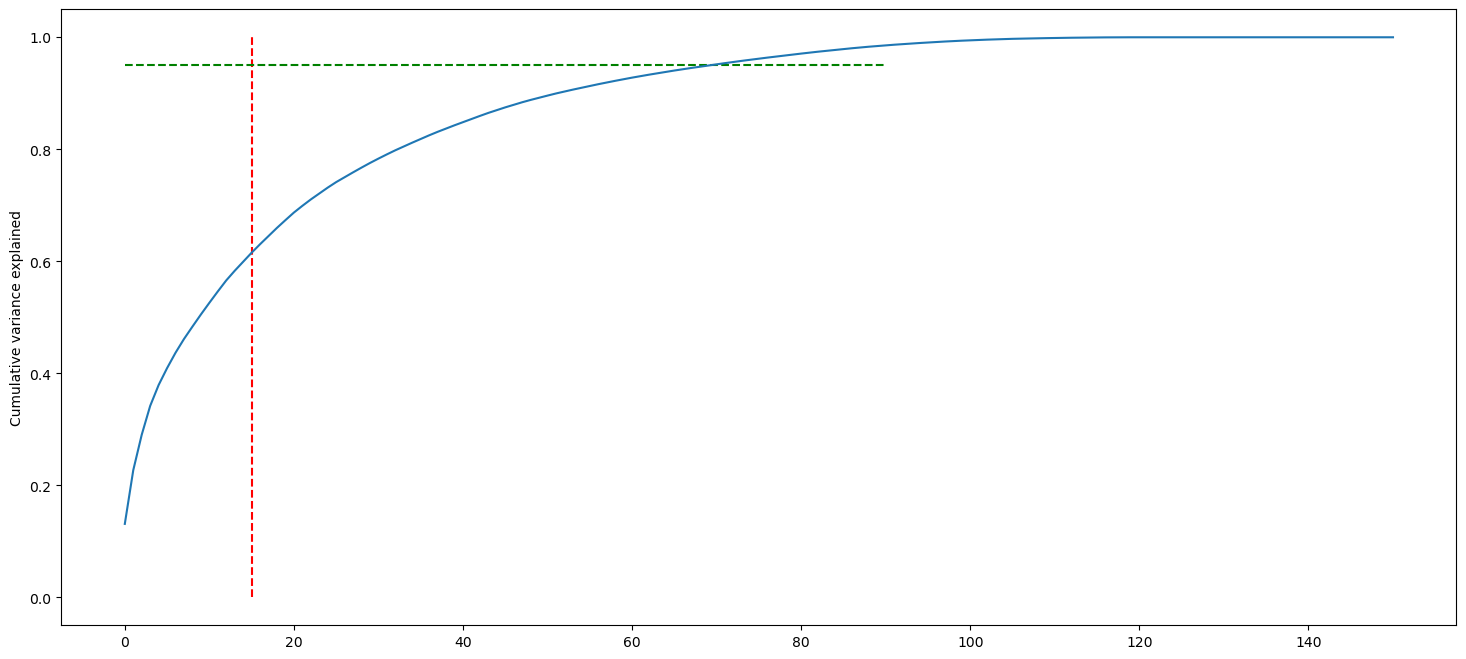

In [36]:
pca.explained_variance_ratio_
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[18,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


### 95% of the variance is explained by around 70 variables

In [37]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=70)
x_train_pca = pca_final.fit_transform(x_train)


x_validate_pca = pca_final.transform(x_validate)

x_test_pca = pca_final.transform(x_test)





In [38]:
LR_Model = LogisticRegression()
LR_Model.fit(x_train_pca, y_train)


# Predicted probabilities
y_validate_prob = LR_Model.predict_proba(x_validate_pca)

# Converting y_pred to a dataframe which is an array
y_validate_prob_df = pd.DataFrame(y_validate_prob)

# Converting to column dataframe
y_validate_prob_df = y_validate_prob_df.iloc[:,[1]]

y_validate_prob_df.columns = ['Pred_Probability']
y_validate_prob_df.head()




,Pred_Probability
0,0.102874
1,0.003091
2,0.050725
3,0.074208
4,0.000229


In [39]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_validate_prob_df['predicted_churn'] = y_validate_prob_df.Pred_Probability.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_validate_prob_df.head()

,Pred_Probability,predicted_churn
0,0.102874,0
1,0.003091,0
2,0.050725,0
3,0.074208,0
4,0.000229,0


In [40]:
# Converting y_validate to dataframe
y_validate_df = pd.DataFrame(y_validate)
y_validate_df.head()
y_validate_df['churn_probability'].value_counts()

churn_probability
0    18845
1     2155
Name: count, dtype: int64

In [41]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_validate_df['churn_probability'], y_validate_prob_df['predicted_churn'])
confusion

array([[18657,   188],
       [ 1673,   482]], dtype=int64)

In [42]:
metrics.accuracy_score(y_validate_df['churn_probability'], y_validate_prob_df['predicted_churn'])

0.9113809523809524

<a name="TestDataset-Prediction"></a>
## TestDataset-Prediction

In [43]:
# Predicted probabilities
y_test_prob = LR_Model.predict_proba(x_test_pca)

# Converting y_pred to a dataframe which is an array
y_test_prob_df = pd.DataFrame(y_test_prob)

# Converting to column dataframe
y_test_prob_df = y_test_prob_df.iloc[:,[1]]

y_test_prob_df.columns = ['Pred_Probability']
y_test_prob_df.head()


# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_prob_df['predicted_churn'] = y_test_prob_df.Pred_Probability.map( lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_prob_df.head()

,Pred_Probability,predicted_churn
0,0.008993,0
1,0.007251,0
2,0.246534,0
3,0.002162,0
4,0.073070,0


In [44]:
y_test_prob_df['predicted_churn'].value_counts()

predicted_churn
0    29012
1      988
Name: count, dtype: int64

In [45]:

df_output = pd.DataFrame()
df_output = pd.read_csv("test.csv")


df_output['churn_probability'] = y_test_prob_df['predicted_churn']
df_output.to_csv('PCA_Supervised.csv', columns=['id', 'churn_probability'], index=False)

In [46]:
df_output.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,0
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00,0
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84,0
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00,0
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00,0



<a name="PCA-Unsupervised"></a>
## PCA Unsupervised

In [47]:
pca_again = PCA(0.95)
df_train_pca2 = pca_again.fit_transform(x_train)
df_validate_pca2 = pca_again.transform(x_validate)
df_test_pca2 = pca_again.transform(x_test)


learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
pred_probs_test2 = model_pca2.predict_proba(df_validate_pca2)[:,1]


# Converting y_pred to a dataframe which is an array
y_validate_UnPCA_prob_df = pd.DataFrame(pred_probs_test2)

# # Converting to column dataframe
#y_validate_UnPCA_prob_df = y_validate_UnPCA_prob_df.iloc[:,[1]]

y_validate_UnPCA_prob_df.columns = ['Pred_Probability']


# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_validate_UnPCA_prob_df['predicted_churn'] = y_validate_UnPCA_prob_df.Pred_Probability.map( lambda x: 1 if x > 0.5 else 0)

# Let's see the head
#y_validate_UnPCA_prob_df.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_validate_df['churn_probability'], y_validate_UnPCA_prob_df['predicted_churn'])
confusion


metrics.accuracy_score(y_validate_df['churn_probability'], y_validate_UnPCA_prob_df['predicted_churn'])

0.9112857142857143

In [48]:

# Predicted probabilities
y_test_prob = model_pca2.predict_proba(df_test_pca2)

# Converting y_pred to a dataframe which is an array
y_test_prob_df = pd.DataFrame(y_test_prob)

# Converting to column dataframe
y_test_prob_df = y_test_prob_df.iloc[:,[1]]

y_test_prob_df.columns = ['Pred_Probability']
y_test_prob_df.head()


# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_prob_df['predicted_churn'] = y_test_prob_df.Pred_Probability.map( lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_prob_df.head()



,Pred_Probability,predicted_churn
0,0.009100,0
1,0.006387,0
2,0.247587,0
3,0.001934,0
4,0.080504,0


In [49]:
df_output = pd.DataFrame()
df_output = pd.read_csv("test.csv")


df_output['churn_probability'] = y_test_prob_df['predicted_churn']
df_output.to_csv('PCA_Un_Supervised.csv', columns=['id', 'churn_probability'], index=False)


<a name="ADABOOST"></a>
## ADABoost

C:\Users\mathu\AppData\Local\Temp\ipykernel_18256\3073718279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x="churn_probability", kind="count", palette="ch:.25", data=df_train);


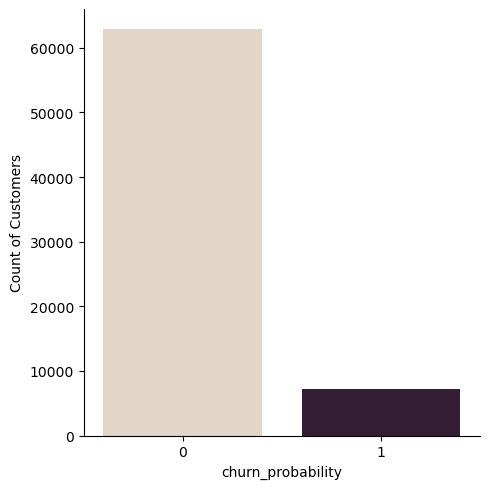

In [50]:
#Checking the number of 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x="churn_probability", kind="count", palette="ch:.25", data=df_train);
ax.set(xlabel = 'churn_probability', ylabel = 'Count of Customers')
plt.show()

In [51]:
df_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,-1.0,-1.0,-1.0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,-1.0,-1.0,-1.0,982,0.0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [52]:
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)

adaboost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [53]:
y_validate_prob = adaboost.predict(x_validate).flatten()
print('Accuracy of the ADABoost model is:  ',accuracy_score(y_validate, y_validate_prob))

Accuracy of the ADABoost model is:   0.9392380952380952


In [54]:
y_test_prob = adaboost.predict(x_test).flatten()


In [55]:

df_output = pd.DataFrame()
df_output = pd.read_csv("test.csv")


#df_output['churn_probability'] = y_test_prob_df['predicted_churn']
df_output['churn_probability'] = y_test_prob

df_output.to_csv('PCA_ADABoost.csv', columns=['id', 'churn_probability'], index=False)

<a name="GradientBoost"></a>
## GradientBoost

In [56]:
gb = GradientBoostingClassifier(random_state=100,n_estimators=75) # default 
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 75,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [57]:
# Fit the model to our train and target
gb.fit(x_train, y_train)
# Get our predictions


GradientBoostingClassifier(n_estimators=75, random_state=100)

In [58]:
gb_validate = gb.predict(x_validate)



In [59]:

#y_validate_prob = adaboost.predict(x_validate).flatten()
print('Accuracy of the GradientBoost model is:  ',accuracy_score(y_validate, gb_validate))

Accuracy of the GradientBoost model is:   0.9422857142857143


In [60]:
y_test_prob = gb.predict(x_test)

df_output = pd.DataFrame()
df_output = pd.read_csv("test.csv")


#df_output['churn_probability'] = y_test_prob_df['predicted_churn']
df_output['churn_probability'] = y_test_prob

df_output.to_csv('PCA_GradientBoost.csv', columns=['id', 'churn_probability'], index=False)

<a name="XGBoost"></a>
## XGBoost

In [61]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [62]:
# Fit the model to our train and target
xgb_cfl.fit(x_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(x_validate)

#y_validate_prob = adaboost.predict(x_validate).flatten()
print('Accuracy of the XGBoost model is:  ',accuracy_score(y_validate, xgb_predictions))

Accuracy of the XGBoost model is:   0.9409047619047619


In [63]:
# A parameter grid for XGBoost
# params = {
#         'n_estimators' : [100, 200, 500, 750], # no of trees 
#         'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10, 12]
#         }

params = {
        'n_estimators' : [100, 300], # no of trees 
        'learning_rate' : [0.01],  # eta
        'min_child_weight': [1, 5],
        'gamma': [0.1],
        'subsample': [0.6],
        'colsample_bytree': [0.6],
        'max_depth': [3, 7]
        }

# Temp
# params = {
#         'n_estimators' : [100,300, 500], # no of trees 
#         'learning_rate' : [0.01],  # eta
#         'min_child_weight': [1, 5],
#         'gamma': [0.1],
#         'subsample': [0.4, 0.6,0.8],
#         'colsample_bytree': [0.4, 0.6,0.8],
#         'max_depth': [3, 7, 11]
#         }

# params = {
#         'n_estimators' : [500], # no of trees 
#         'learning_rate' : [0.01],  # eta
#         'min_child_weight': [1],
#         'gamma': [0.1],
#         'subsample': [0.4],
#         'colsample_bytree': [0.6],
#         'max_depth': [ 7]
#         }


folds = 5
#folds = 10
param_comb = 8000

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3, random_state=42)
#random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3)


In [64]:
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\mathu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=8000. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=8000, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6],
                                        'gamma': [0.1], 'learning_rate': [0.01],
                                        'max_depth': [3, 7],
                                        'min_child_weight': [1, 5],
                                        'n_estimators': [100, 300],
                                        'subsample': [0.6]},
                   random_state=42, scoring='accuracy', verbose=3)

In [65]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

 Best accuracy for 5-fold search with 8000 parameter combinations:
0.9424478257881376

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsamp

In [66]:


xgb_predictions_hpt = random_search.predict(x_validate)
accuracy_score(y_validate, xgb_predictions_hpt)

# print('Accuracy of the XGBoost model is:  ',accuracy_score(y_validate, xgb_predictions))

0.942

In [67]:
y_test_prob = random_search.predict(x_test)

df_output = pd.DataFrame()
df_output = pd.read_csv("test.csv")


#df_output['churn_probability'] = y_test_prob_df['predicted_churn']
df_output['churn_probability'] = y_test_prob

df_output.to_csv('PCA_XGBoost.csv', columns=['id', 'churn_probability'], index=False)

<a name="Conclusion"></a>
## Conclusion

As a first step the Dataset was analyzed and there were 69999 rows and 172 columns. 

As part of data preparation:

	Columns that have single value only (Across) were deleted as they do not add any value for the learning.

	Also the coulumns with date value were analyzed and found that it does not add any value.

	Idenfited columns that have categorial value and updated the NAN's

As part of Data Analysis it is found that

    Most of the Churn is from the customers with low AON (Age on network). Customers with high AON are unlikely to leave.    
    The ARPU (Average Revenue Per User Decrease month after month is one of the factor to predict churn.
    The Mean number of Incoming/Outgoing calls is high for customers who are at risk of Churn
    Minutes of usage Decrease month after month is one of the factor to predict churn)
    Minutes ofA Steedy Decrease Month after Month in Avg Min outside woek is also a factor for Churn.

Prediction:

    PCA was used both in Supervised and Unsupervised mode and received an accuracy of 91%.
    Using Adaboost received an accuracy of around 93%
    Using Gradientboost received an accuracy of around 93.5%
    XGBoost gave the highest accuracy of 94%+ most of the time.

